In [64]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [65]:
import os
os.chdir('/content/gdrive/My Drive')
!pwd

/content/gdrive/My Drive


In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import norm

In [67]:
data = pd.read_csv('GlobalLandTemperaturesByCity.csv')
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [68]:
data.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,8.235082e+06,8.235082e+06
mean,1.672743e+01,1.028575e+00
std,1.035344e+01,1.129733e+00
min,-4.270400e+01,3.400000e-02
25%,1.029900e+01,3.370000e-01
50%,1.883100e+01,5.910000e-01
75%,2.521000e+01,1.349000e+00
max,3.965100e+01,1.539600e+01


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


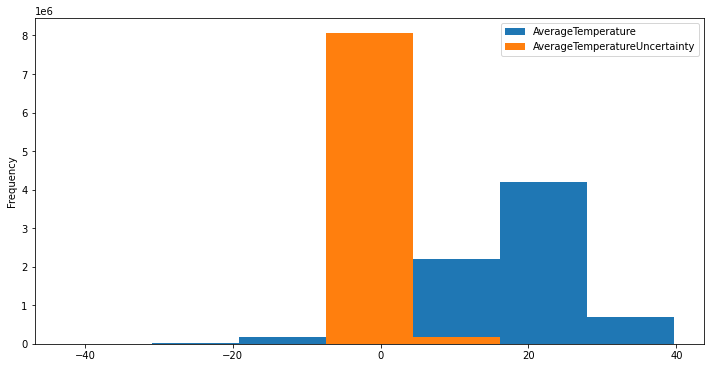

In [70]:
data.plot(kind = 'hist', bins = 7, figsize=(12,6))

In [71]:
data['Latitude'].unique()

array(['57.05N', '40.99N', '50.63N', '44.20N', '42.59N', '5.63N',
       '29.74N', '53.84N', '49.03N', '7.23N', '18.48N', '36.17N',
       '32.95N', '24.92N', '8.84N', '16.87N', '21.70N', '45.81N',
       '34.56S', '13.66N', '20.09N', '7.23S', '15.27N', '39.38N',
       '23.31N', '26.52N', '31.35N', '34.56N', '37.78N', '12.05S',
       '26.52S', '36.17S', '28.13N', '52.24N', '55.45N', '47.42N',
       '0.80S', '4.02S', '12.05N', '23.31S', '16.87S', '61.88N', '18.48S',
       '20.09S', '21.70S', '10.45S', '24.92S', '65.09N', '4.02N',
       '13.66S', '10.45N', '39.38S', '2.41N', '8.84S', '5.63S', '58.66N',
       '60.27N', '32.95S', '0.80N', '15.27S', '29.74S', '28.13S', '2.41S',
       '44.20S', '45.81S', '31.35S', '37.78S', '42.59S', '40.99S',
       '68.31N', '69.92N', '52.24S', '63.49N'], dtype=object)

In [72]:
bdata = data.copy()
bdata

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E


In [73]:
bdata['Latitude'] = bdata.Latitude.str.replace('S','')

In [74]:

elist = []
for elem in bdata['Latitude']:
    elem = '-'+elem
    elist.append(elem)

In [75]:
from pandas import DataFrame
df1 = DataFrame (elist,columns=['lat'])


In [76]:
df1['lat'] = df1['lat'].apply(lambda x : x.replace('-','') if 'N' in x else x)

In [77]:
df1['lat'].unique()


array(['57.05N', '40.99N', '50.63N', '44.20N', '42.59N', '5.63N',
       '29.74N', '53.84N', '49.03N', '7.23N', '18.48N', '36.17N',
       '32.95N', '24.92N', '8.84N', '16.87N', '21.70N', '45.81N',
       '-34.56', '13.66N', '20.09N', '-7.23', '15.27N', '39.38N',
       '23.31N', '26.52N', '31.35N', '34.56N', '37.78N', '-12.05',
       '-26.52', '-36.17', '28.13N', '52.24N', '55.45N', '47.42N',
       '-0.80', '-4.02', '12.05N', '-23.31', '-16.87', '61.88N', '-18.48',
       '-20.09', '-21.70', '-10.45', '-24.92', '65.09N', '4.02N',
       '-13.66', '10.45N', '-39.38', '2.41N', '-8.84', '-5.63', '58.66N',
       '60.27N', '-32.95', '0.80N', '-15.27', '-29.74', '-28.13', '-2.41',
       '-44.20', '-45.81', '-31.35', '-37.78', '-42.59', '-40.99',
       '68.31N', '69.92N', '-52.24', '63.49N'], dtype=object)

In [78]:
df1.lat.str.replace('N','')

0          57.05
1          57.05
2          57.05
3          57.05
4          57.05
           ...  
8599207    52.24
8599208    52.24
8599209    52.24
8599210    52.24
8599211    52.24
Name: lat, Length: 8599212, dtype: object

In [79]:
df1['lat'] = df1.lat.str.replace('N','')

In [80]:
df1['lat'] = df1['lat'].astype(float)

In [81]:

bdata


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E


In [82]:
df =  pd.concat([bdata, df1], axis=1)
df = df.drop(['Latitude','Longitude','City','AverageTemperatureUncertainty'], axis=1)
df = df.dropna(axis = 0)

In [83]:
arctic_circle = df.loc[df['lat'] >= 66.34]
# arctic_circle.dropna(axis = 0)
arctic_circle = arctic_circle.dropna()
arctic_circle.isnull().sum()

dt                    0
AverageTemperature    0
Country               0
lat                   0
dtype: int64

In [84]:
tropic_of_cancer = df.loc[(df['lat'] < 66.34) & (df['lat'] >= 23.26)]
tropic_of_cancer = tropic_of_cancer.dropna()
tropic_of_cancer.isnull().sum()

dt                    0
AverageTemperature    0
Country               0
lat                   0
dtype: int64

In [85]:
equator = df.loc[(df['lat'] < 23.26) & (df['lat'] >= -23.26)]
equator = equator.dropna()
equator.isnull().sum()

dt                    0
AverageTemperature    0
Country               0
lat                   0
dtype: int64

In [86]:
tropic_of_capricorn = df.loc[(df['lat'] < -23.26) & (df['lat'] >= -66.34)]
tropic_of_capricorn = tropic_of_capricorn.dropna()
tropic_of_capricorn.isnull().sum()

dt                    0
AverageTemperature    0
Country               0
lat                   0
dtype: int64

In [87]:
antarctic_circle = df.loc[df['lat'] < -66.34]
antarctic_circle.isnull().sum()

dt                    0
AverageTemperature    0
Country               0
lat                   0
dtype: int64

In [88]:
equator["Date"]= pd.to_datetime(equator["dt"])
tropic_of_cancer['Date'] = pd.to_datetime(tropic_of_cancer['dt'])
tropic_of_capricorn['Date'] = pd.to_datetime(tropic_of_capricorn['dt'])
arctic_circle['Date'] = pd.to_datetime(arctic_circle['dt'])

In [89]:
# data2 = tropic_of_cancer.copy()
# dataCancer = data2.stack()
# dataCancer = dataCancer.reset_index()
# # Now we combine the dates and the hours into a datetime, and set this as the index
# dataCancer.index = pd.to_datetime(dataCancer['dt'], format='%Y-%m-%d')
# # Drop the origal date and hour columns
# dataCancer = dataCancer.drop(['dt', 'level_1'], axis =1)
# dataCancer = dataCancer.rename(columns={0: 'tropic_of_cancer'})
# dataCancer.dropna()
# dataCancer

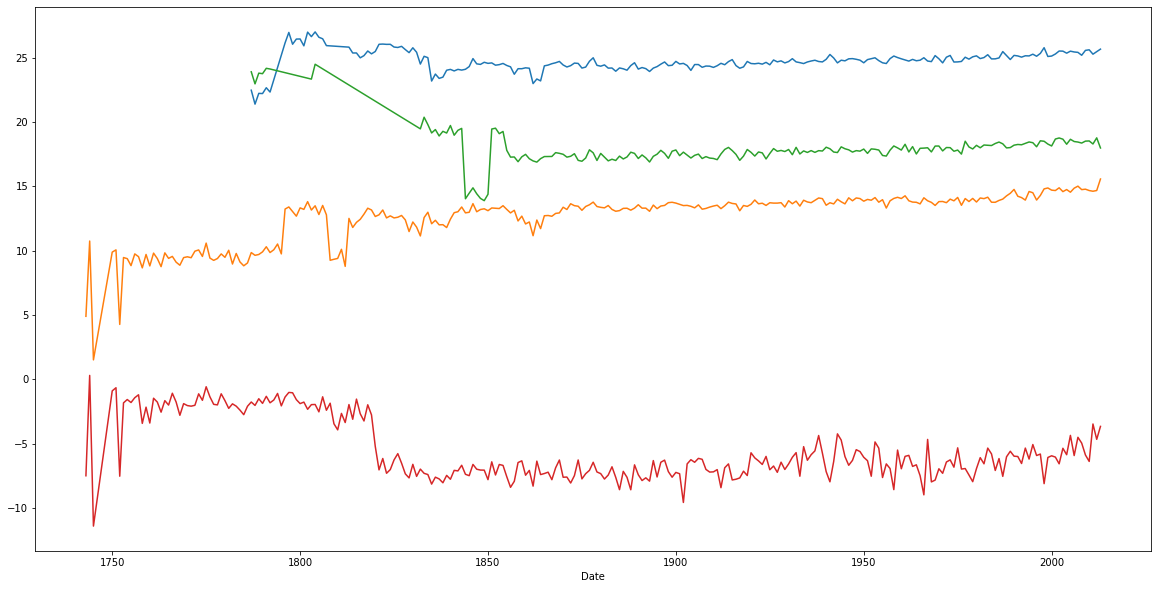

In [90]:
equator['AverageTemperature'].groupby(equator['Date'].dt.year).mean().plot(figsize = (20, 10))
tropic_of_cancer['AverageTemperature'].groupby(tropic_of_cancer['Date'].dt.year).mean().plot(figsize = (20, 10))
tropic_of_capricorn['AverageTemperature'].groupby(tropic_of_capricorn['Date'].dt.year).mean().plot(figsize = (20, 10))
arctic_circle['AverageTemperature'].groupby(arctic_circle['Date'].dt.year).mean().plot(figsize = (20, 10))


###EQUATOR

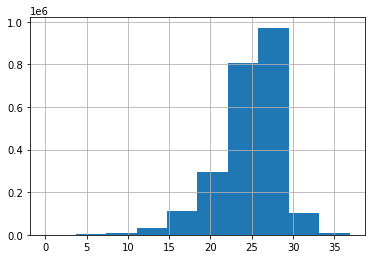

In [91]:
equator['AverageTemperature'].hist()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


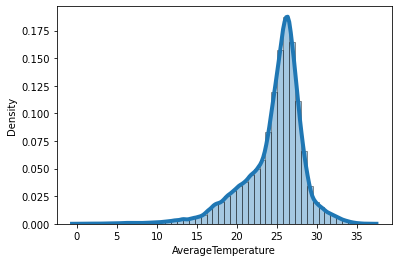

In [108]:
sns.distplot(equator['AverageTemperature'], hist=True, kde=True, 
            #  bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

###TROPIC OF CANCER

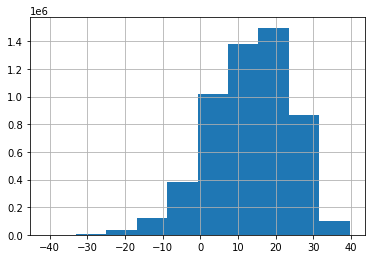

In [95]:
tropic_of_cancer['AverageTemperature'].hist()


In [96]:
s = bdata['AverageTemperature']

In [97]:
mu, sigma = tropic_of_cancer['AverageTemperature'].mean(),  tropic_of_cancer['AverageTemperature'].std() 
abs(mu - np.mean(s))
abs(sigma - np.std(s, ddof=1))

0.31439561891433954

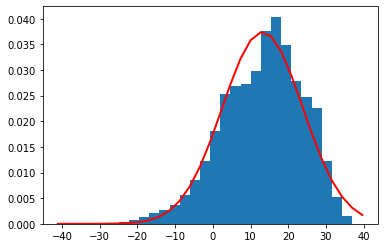

In [98]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(tropic_of_cancer['AverageTemperature'], 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

###TROPIC OF CAPRICORN

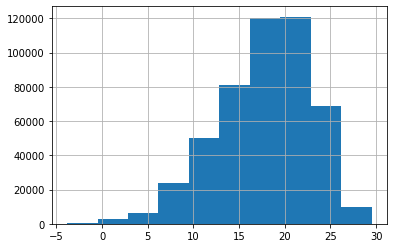

In [99]:
tropic_of_capricorn['AverageTemperature'].hist()

In [100]:
mu, sigma = tropic_of_capricorn['AverageTemperature'].mean(),  tropic_of_capricorn['AverageTemperature'].std() 
abs(mu - np.mean(s))
abs(sigma - np.std(s, ddof=1))

5.253397515094712

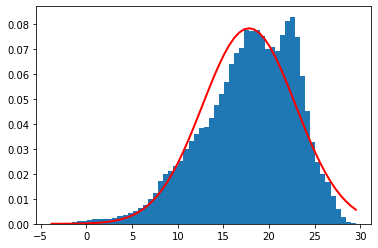

In [101]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(tropic_of_capricorn['AverageTemperature'], 60, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

###ARCTIC CIRCLE


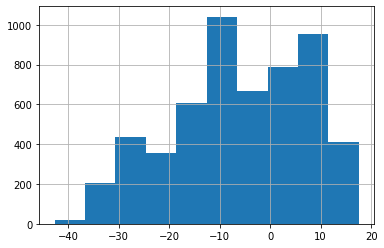

In [102]:
arctic_circle['AverageTemperature'].hist()

In [103]:
mu, sigma = arctic_circle['AverageTemperature'].mean(),  arctic_circle['AverageTemperature'].std() 
abs(mu - np.mean(s))

22.73819626929557

In [104]:
abs(sigma - np.std(s, ddof=1))

2.949903004820106

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


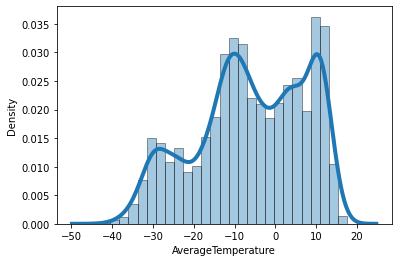

In [107]:
sns.distplot(arctic_circle['AverageTemperature'], hist=True, kde=True, 
            #  bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [ ]:
arctic_circle['AverageTemperature'].plot.kde()

In [ ]:
arctic_circle.boxplot(column=['AverageTemperature'])  




In [ ]:
 equator.boxplot(column=['AverageTemperature'])


In [ ]:
tropic_of_capricorn.boxplot(column=['AverageTemperature'])

In [ ]:
tropic_of_cancer.boxplot(column=['AverageTemperature'])

In [ ]:
data = data.dropna(axis = 0)
data

In [ ]:
mu1 = data['AverageTemperature'].mean()
mu1

sigma1 = data['AverageTemperature'].std()
sigma1
# 
from scipy.stats import moment

firstmoment = moment(data['AverageTemperature'],moment=1)
firstmoment

secondmoment = moment(data['AverageTemperature'],moment=2)
secondmoment

mu2 = data['AverageTemperatureUncertainty'].mean()
mu2

sigma2 = data['AverageTemperatureUncertainty'].std()
sigma2

firstmoment = moment(data['AverageTemperatureUncertainty'], moment=1)
firstmoment

secondmoment = moment(data['AverageTemperatureUncertainty'], moment=2)
print('first')
print(firstmoment)
print()
print('second')
print(secondmoment)


In [ ]:
print()

In [109]:
import os
os.chdir('/content/gdrive/My Drive/Colab Notebooks')
!pwd

/content/gdrive/My Drive/Colab Notebooks


In [110]:
!git config --global user.email "hungvuive2000@gmail.com"
!git config --global user.name "dangquanghung"